In [2]:
# Import libraries
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [7]:
# load data
dfy = pd.read_csv("labels_train.csv")
y = []
for val in range(dfy.shape[0]):
    y.append(dfy.iloc[val][0])
y = np.asarray(y)

dfx = pd.read_csv("msgs_vec_train.csv")
X = []
for row in range(dfx.shape[0]):
    vec = []
    for val in dfx.iloc[row]:
        vec.append(val)
    X.append(vec)
X = np.asarray(X)
print(y.shape,X.shape)

(21840,) (21840, 500)


In [8]:
# preprocess y data to categories
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
Y.shape
print(Y[5].dtype)
tf.__version__

float64


'2.1.0'

In [14]:
# create a model
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(500, activation='relu'))
# Add another:
model.add(layers.Dense(500, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(7, activation='softmax'))

In [15]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=METRICS)

In [18]:
# train model
history = model.fit(X, Y, epochs=20, validation_split=0.3, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Train on 15287 samples, validate on 6553 samples
Epoch 1/20
15287/15287 [==============================] - 4s 234us/sample - loss: 4.0286 - tp: 8841.0000 - fp: 1735.0000 - tn: 89987.0000 - fn: 6446.0000 - accuracy: 0.9235 - precision: 0.8359 - recall: 0.5783 - auc: 0.9352 - val_loss: 4.4062 - val_tp: 3110.0000 - val_fp: 1098.0000 - val_tn: 38220.0000 - val_fn: 3443.0000 - val_accuracy: 0.9010 - val_precision: 0.7391 - val_recall: 0.4746 - val_auc: 0.8779
Epoch 2/20
15287/15287 [==============================] - 4s 236us/sample - loss: 3.9992 - tp: 9234.0000 - fp: 1677.0000 - tn: 90045.0000 - fn: 6053.0000 - accuracy: 0.9278 - precision: 0.8463 - recall: 0.6040 - auc: 0.9416 - val_loss: 4.4328 - val_tp: 3276.0000 - val_fp: 1297.0000 - val_tn: 38021.0000 - val_fn: 3277.0000 - val_accuracy: 0.9003 - val_precision: 0.7164 - val_recall: 0.4999 - val_auc: 0.8774
Epoch 3/20
15287/15287 [==============================] - 4s 234us/sample - loss: 3.9640 - tp: 9580.0000 - fp: 1678.0000 - tn: 9004

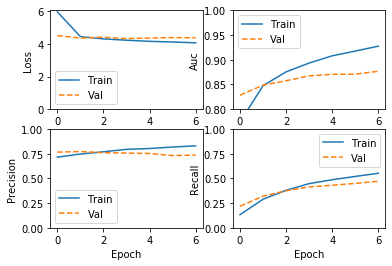

In [17]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.rcParams["figure.figsize"]=40,40
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    
plot_metrics(history)